In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path  = ('/content/drive/MyDrive/새싹2기/python_DA/data/tips.csv')
tips = pd.read_csv(path)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# [1] Pandas로 간단 시각화

In [4]:
tips.shape

(244, 7)

In [5]:
tips.info()

# 수치형 변수: float, int
# 범주형 변수: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## (1) 히스토그램
- 단일 값들의 분포 확인

<Axes: ylabel='Frequency'>

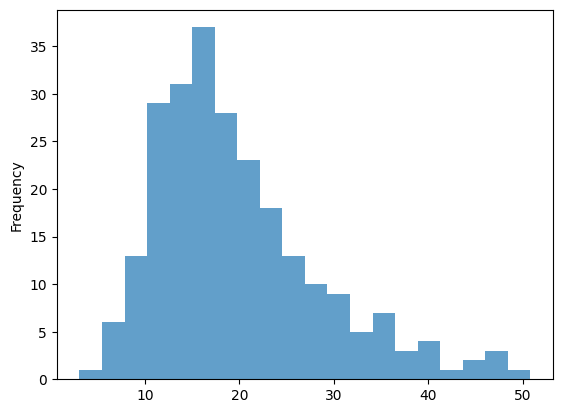

In [6]:
tips['total_bill'].plot.hist(bins=20, alpha=0.7)

<Axes: ylabel='Frequency'>

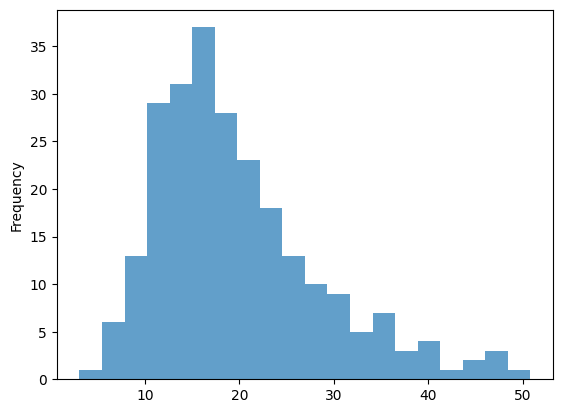

In [7]:
tips['total_bill'].plot(kind ='hist', bins=20, alpha=0.7)

## (2) box plot
- 데이터 분포와 이상치 파악

<Axes: >

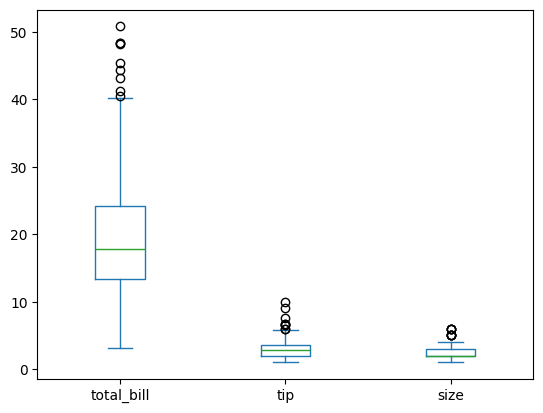

In [8]:
tips.plot.box()
# 수치형 데이터 -> 모두 하나의 그래프 상에 그려줌

<Axes: >

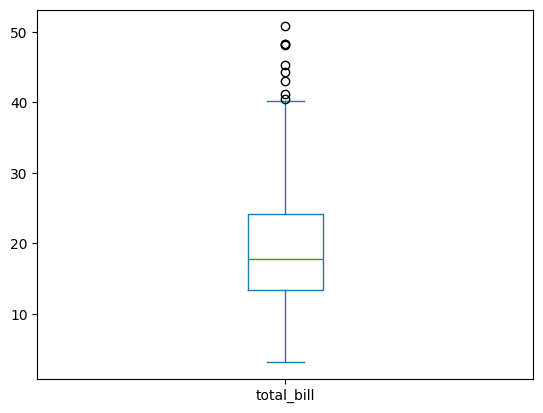

In [9]:
# series로 접근해서 plot
tips['total_bill'].plot(kind='box')

## (3) 산점도 - scatter
- 산점도는 두 변수 간의 관계를 시각화하는 데 사용

<Axes: xlabel='total_bill', ylabel='tip'>

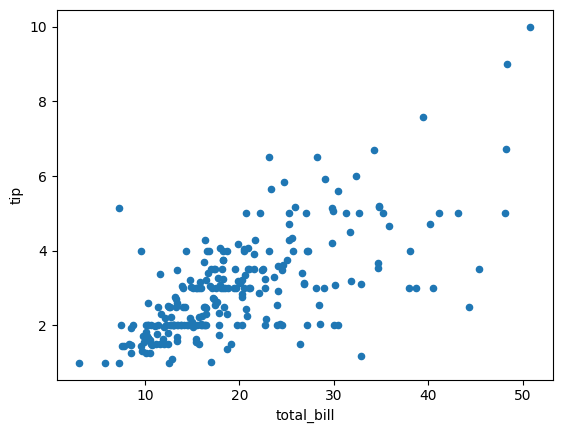

In [10]:
tips.plot.scatter(x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

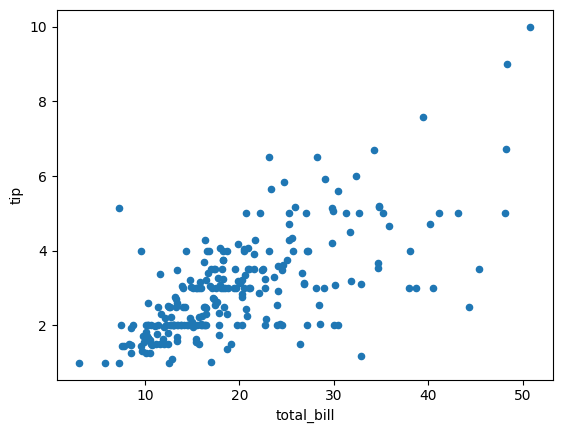

In [11]:
tips.plot(kind = 'scatter',x='total_bill', y='tip')

## (4) 막대그래프 - bar
- 범주형 데이터 간의 값 크기를 비교하는데 사용
- `group by`  와 함께 사용 가능

In [12]:
tips['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [13]:
vc = tips['day'].value_counts(sort=False)
vc.reindex(['Thur','Fri','Sat','Sun'])

,count
day,
Thur,62
Fri,19
Sat,87
Sun,76


<Axes: xlabel='day'>

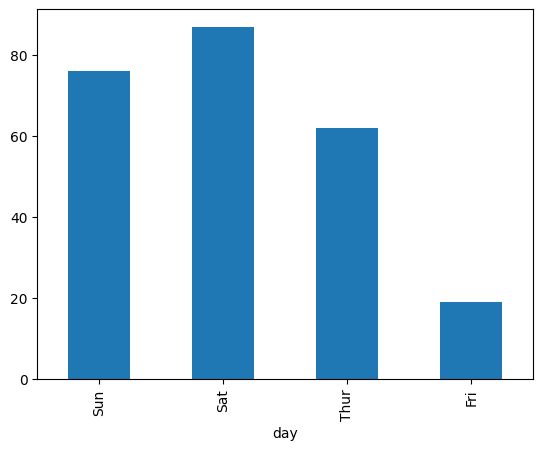

In [14]:
vc.plot.bar()

<Axes: xlabel='day'>

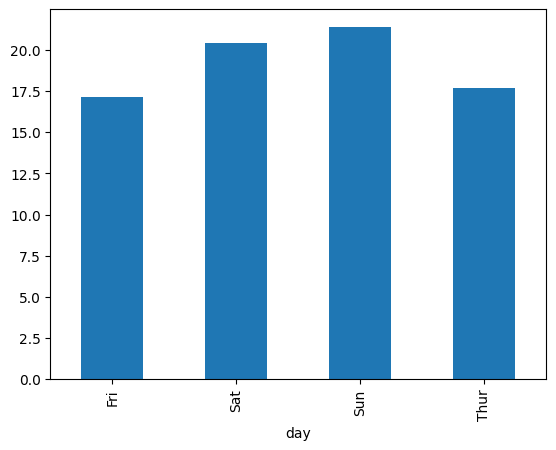

In [33]:
tips.groupby('day')['total_bill'].mean().plot.bar()

## (5) 파이차트
-범주별 구성 비율 확인

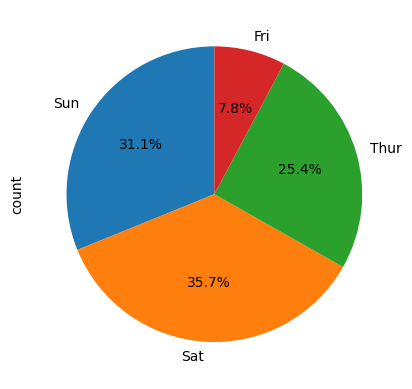

In [16]:
vc.plot.pie(autopct ='%1.1f%%', startangle=90);

# 세미 콜론 사용시 부가 정보 없이 그래프만 보임

## *실습: 기초 시각화

In [18]:
path = ('/content/drive/MyDrive/새싹2기/python_DA/data/titanic.csv')
titan = pd.read_csv(path)
titan

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- 생존자 수 비교
  - 생존 여부(survived)의 구성 비율을 확인하기 위해 생존자 / 사망자 수를 파이 차트로 표시하세요.

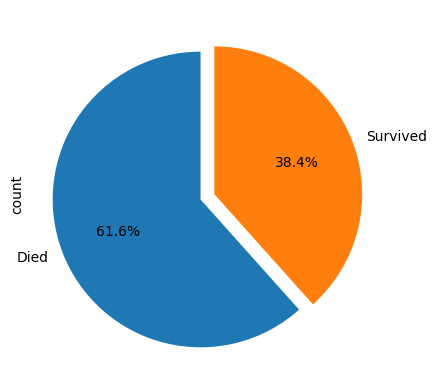

In [36]:
titan['survived'].value_counts().plot.pie(autopct = '%1.1f%%',
                           startangle=90, labels=['Died','Survived'],
                                          explode = [0.1, 0]);

- 객실 등급별 승객 수
  - 객실 등급(class)별 승객 수를 집계하여 막대 그래프로 표시하세요.

<Axes: xlabel='class', ylabel='passenger'>

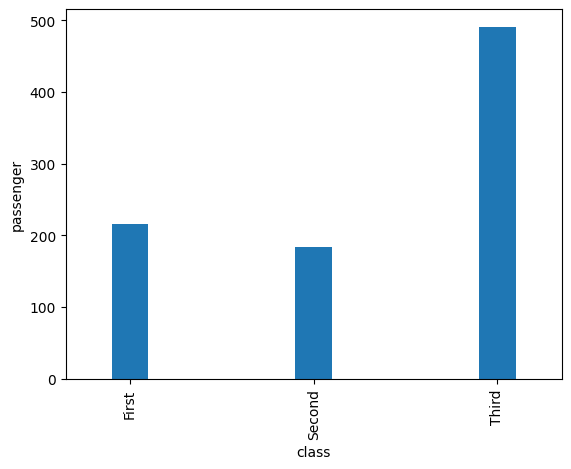

In [45]:
cpa = titan['class'].value_counts()
cpa.reindex(['First', 'Second', 'Third']).plot.bar(ylabel='passenger', width=0.2)

- 나이 분포
  - 승객의 나이(age) 분포를 확인하기 위해 히스토그램으로 표시하세요.

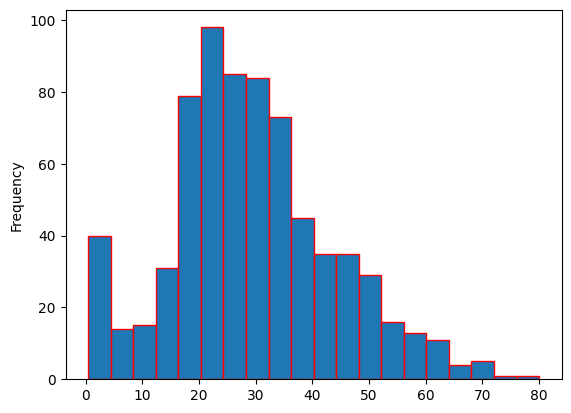

In [28]:
titan['age'].plot.hist(bins = 20, edgecolor='red');